# Imports

In [14]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/My Drive/comp551_a4/")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
!nvidia-smi

Sat Dec 14 18:00:27 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.44       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P0    41W / 250W |    835MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [16]:
!pip install git+https://github.com/rtqichen/torchdiffeq

  Cloning https://github.com/rtqichen/torchdiffeq to /tmp/pip-req-build-nlaclaqd
  Running command git clone -q https://github.com/rtqichen/torchdiffeq /tmp/pip-req-build-nlaclaqd
  Created wheel for torchdiffeq: filename=torchdiffeq-0.0.1-cp36-none-any.whl size=25885 sha256=f3b4cbce014e03d2994f2ba8adf856686ec2f0e2d87e57b734fc24539200d271
  Stored in directory: /tmp/pip-ephem-wheel-cache-cvs0ub8z/wheels/3f/76/69/01867bf3355c3bc8bae7e556b17b44c395b6cda5e76fd8ddc7
Successfully built torchdiffeq


In [0]:
import torch
import torch.optim as optim
import numpy as np
import node_models
import loader
import training
import metrics
import autotune
import config
import pickle

# GPU

In [0]:
device = torch.device("cuda")

# Data Loading

In [0]:
mnist_data_path = './train-images-idx3-ubyte'
mnist_label_path = './train-labels-idx1-ubyte'

In [0]:
#5-fold generation
mnist_data = loader.MNIST(mnist_data_path, mnist_label_path, 3)
mnist_splits = mnist_data.splits

In [21]:
print("MNIST STATS")
print("Number of splits:", len(mnist_splits))
print("Number of segments per split (train, val, test):", len(mnist_splits[0]))
print("Info per segment (data, labels):", len(mnist_splits[0][0]))
print("Size of segement (num examples):", len(mnist_splits[0][0][0]))

MNIST STATS
Number of splits: 3
Number of segments per split (train, val, test): 3
Info per segment (data, labels): 2
Size of segement (num examples): 40000


# Model & Optimizer

In [0]:
model = node_models.NeuralODE
optimizer = optim.Adam

# Training and Evaluation

## MNIST

### NODE

In [0]:
model_params = config.baseline_config_mnist_node['model']
lr, epochs, batch, workers = config.baseline_config_mnist_node['train']

In [0]:
node_mnist_trainer = training.Trainer(model, optimizer, mnist_data, device)

In [25]:
node_mnist_trainer.train(model_params, lr, epochs, batch, num_workers=4, verbose=True, num_loss=3)

[1,   416] loss: 2.10365
[1,   832] loss: 0.38432
[1,  1248] loss: 0.33804
[Fold 1] Epoch:1 Training Acc:0.847725
[Fold 1] Epoch:1 Validation Acc:0.8983
[2,   416] loss: 0.31720
[2,   832] loss: 0.29770
[2,  1248] loss: 0.27384
[Fold 1] Epoch:2 Training Acc:0.91265
[Fold 1] Epoch:2 Validation Acc:0.9226
[3,   416] loss: 0.24057
[3,   832] loss: 0.21027
[3,  1248] loss: 0.22516
[Fold 1] Epoch:3 Training Acc:0.93335
[Fold 1] Epoch:3 Validation Acc:0.9357
[4,   416] loss: 0.21528
[4,   832] loss: 0.18900
[4,  1248] loss: 0.18515
[Fold 1] Epoch:4 Training Acc:0.942
[Fold 1] Epoch:4 Validation Acc:0.9443
[5,   416] loss: 0.17270
[5,   832] loss: 0.17491
[5,  1248] loss: 0.16730
[Fold 1] Epoch:5 Training Acc:0.948625
[Fold 1] Epoch:5 Validation Acc:0.9461
[6,   416] loss: 0.15132
[6,   832] loss: 0.15461
[6,  1248] loss: 0.14810
[Fold 1] Epoch:6 Training Acc:0.95425
[Fold 1] Epoch:6 Validation Acc:0.9486
[7,   416] loss: 0.13131
[7,   832] loss: 0.14009
[7,  1248] loss: 0.14819
[Fold 1] Epoc

In [0]:
pickle.dump( node_mnist_trainer.train_metrics, open( "node_mnist_train.p", "wb" ) )
pickle.dump( node_mnist_trainer.val_metrics, open( "node_mnist_val.p", "wb" ) )

In [0]:
#node_mnist_trainer.test(model_params, 10, 3)

In [0]:
#pickle.dump( node_mnist_trainer.test_metrics, open( "mnist_test.p", "wb" ) )

In [0]:
 torch.cuda.empty_cache()

### ANODE

In [0]:
model_params = config.baseline_config_mnist_anode['model']
lr, epochs, batch, workers = config.baseline_config_mnist_anode['train']

In [0]:
anode_mnist_trainer = training.Trainer(model, optimizer, mnist_data, device)

In [0]:
anode_mnist_trainer.train(model_params, lr, epochs, batch, num_workers=4, verbose=True, num_loss=3)

In [0]:
"""
[1,    52] loss: 3.60078
[1,   104] loss: 0.80178
[1,   156] loss: 0.44074
[Fold 1] Epoch:1 Training Acc:0.8394
[Fold 1] Epoch:1 Validation Acc:0.9299
[2,    52] loss: 0.20835
[2,   104] loss: 0.14444
[2,   156] loss: 0.11730
[Fold 1] Epoch:2 Training Acc:0.95545
[Fold 1] Epoch:2 Validation Acc:0.9685
[3,    52] loss: 0.07681
[3,   104] loss: 0.07240
[3,   156] loss: 0.07986
[Fold 1] Epoch:3 Training Acc:0.976525
[Fold 1] Epoch:3 Validation Acc:0.972
[4,    52] loss: 0.05282
[4,   104] loss: 0.05588
[4,   156] loss: 0.05315
[Fold 1] Epoch:4 Training Acc:0.98255
[Fold 1] Epoch:4 Validation Acc:0.9682
[5,    52] loss: 0.04558
[5,   104] loss: 0.04209
[5,   156] loss: 0.04810
[Fold 1] Epoch:5 Training Acc:0.98545
[Fold 1] Epoch:5 Validation Acc:0.9712
[6,    52] loss: 0.02783
[6,   104] loss: 0.02844
[6,   156] loss: 0.03403
[Fold 1] Epoch:6 Training Acc:0.990275
[Fold 1] Epoch:6 Validation Acc:0.9735
[7,    52] loss: 0.02378
[7,   104] loss: 0.02355
[7,   156] loss: 0.02646
[Fold 1] Epoch:7 Training Acc:0.99145
[Fold 1] Epoch:7 Validation Acc:0.9628
[8,    52] loss: 0.02549
[8,   104] loss: 0.03138
[8,   156] loss: 0.04309
[Fold 1] Epoch:8 Training Acc:0.98885
[Fold 1] Epoch:8 Validation Acc:0.9671
[9,    52] loss: 0.03054
[9,   104] loss: 0.03268
[9,   156] loss: 0.03262
[Fold 1] Epoch:9 Training Acc:0.988925
[Fold 1] Epoch:9 Validation Acc:0.9672
[10,    52] loss: 0.01370
[10,   104] loss: 0.01519
[10,   156] loss: 0.01572
[Fold 1] Epoch:10 Training Acc:0.9945
[Fold 1] Epoch:10 Validation Acc:0.9697
[11,    52] loss: 0.01081
[11,   104] loss: 0.00790
[11,   156] loss: 0.01478
[Fold 1] Epoch:11 Training Acc:0.99655
[Fold 1] Epoch:11 Validation Acc:0.9679
[12,    52] loss: 0.01500
[12,   104] loss: 0.01499
[12,   156] loss: 0.02318
[Fold 1] Epoch:12 Training Acc:0.99405
[Fold 1] Epoch:12 Validation Acc:0.9688
[13,    52] loss: 0.01048
[13,   104] loss: 0.02182
[13,   156] loss: 0.02571
[Fold 1] Epoch:13 Training Acc:0.993425
[Fold 1] Epoch:13 Validation Acc:0.9706
[14,    52] loss: 0.02136
[14,   104] loss: 0.02426
[14,   156] loss: 0.03797
[Fold 1] Epoch:14 Training Acc:0.991825
[Fold 1] Epoch:14 Validation Acc:0.9674
[15,    52] loss: 0.02492
[15,   104] loss: 0.02062
[15,   156] loss: 0.02078
[Fold 1] Epoch:15 Training Acc:0.9925
[Fold 1] Epoch:15 Validation Acc:0.9709
[1,    52] loss: 4.07307
[1,   104] loss: 1.00758
[1,   156] loss: 0.63760
[Fold 2] Epoch:1 Training Acc:0.83975
[Fold 2] Epoch:1 Validation Acc:0.9075
[2,    52] loss: 0.27554
[2,   104] loss: 0.22013
[2,   156] loss: 0.16913
[Fold 2] Epoch:2 Training Acc:0.9431
[Fold 2] Epoch:2 Validation Acc:0.9524
[3,    52] loss: 0.10522
[3,   104] loss: 0.11788
[3,   156] loss: 0.09304
[Fold 2] Epoch:3 Training Acc:0.9692
[Fold 2] Epoch:3 Validation Acc:0.9639
[4,    52] loss: 0.06839
[4,   104] loss: 0.06205
[4,   156] loss: 0.07163
[Fold 2] Epoch:4 Training Acc:0.979975
[Fold 2] Epoch:4 Validation Acc:0.9651
[5,    52] loss: 0.04514
[5,   104] loss: 0.04895
[5,   156] loss: 0.04824
[Fold 2] Epoch:5 Training Acc:0.986275
[Fold 2] Epoch:5 Validation Acc:0.9654
[6,    52] loss: 0.03697
[6,   104] loss: 0.03365
[6,   156] loss: 0.04330
[Fold 2] Epoch:6 Training Acc:0.988225
[Fold 2] Epoch:6 Validation Acc:0.9693
[7,    52] loss: 0.02604
[7,   104] loss: 0.02745
[7,   156] loss: 0.03596
[Fold 2] Epoch:7 Training Acc:0.99035
[Fold 2] Epoch:7 Validation Acc:0.9652
[8,    52] loss: 0.02229
[8,   104] loss: 0.02409
[8,   156] loss: 0.02824
[Fold 2] Epoch:8 Training Acc:0.9916
[Fold 2] Epoch:8 Validation Acc:0.9685
[9,    52] loss: 0.01540
[9,   104] loss: 0.02103
[9,   156] loss: 0.02933
[Fold 2] Epoch:9 Training Acc:0.992825
[Fold 2] Epoch:9 Validation Acc:0.9652
[10,    52] loss: 0.02394
[10,   104] loss: 0.02489
[10,   156] loss: 0.03333
[Fold 2] Epoch:10 Training Acc:0.9906
[Fold 2] Epoch:10 Validation Acc:0.9649
[11,    52] loss: 0.02413
[11,   104] loss: 0.02739
[11,   156] loss: 0.03727
[Fold 2] Epoch:11 Training Acc:0.989675
[Fold 2] Epoch:11 Validation Acc:0.9613
[12,    52] loss: 0.02746
[12,   104] loss: 0.02564
[12,   156] loss: 0.02812
[Fold 2] Epoch:12 Training Acc:0.99055
[Fold 2] Epoch:12 Validation Acc:0.9665
[13,    52] loss: 0.02101
[13,   104] loss: 0.02161
[13,   156] loss: 0.02296
[Fold 2] Epoch:13 Training Acc:0.992275
[Fold 2] Epoch:13 Validation Acc:0.9675
[14,    52] loss: 0.03169
[14,   104] loss: 0.03167
[14,   156] loss: 0.02210
[Fold 2] Epoch:14 Training Acc:0.99065
[Fold 2] Epoch:14 Validation Acc:0.9682
[15,    52] loss: 0.01232
[15,   104] loss: 0.01559
[15,   156] loss: 0.01744
[Fold 2] Epoch:15 Training Acc:0.994675
[Fold 2] Epoch:15 Validation Acc:0.9705
[1,    52] loss: 3.14036
[1,   104] loss: 0.54199
[1,   156] loss: 0.25311
[Fold 3] Epoch:1 Training Acc:0.872375
[Fold 3] Epoch:1 Validation Acc:0.9312
[2,    52] loss: 0.15306
[2,   104] loss: 0.12546
[2,   156] loss: 0.10537
[Fold 3] Epoch:2 Training Acc:0.96355
[Fold 3] Epoch:2 Validation Acc:0.9642
[3,    52] loss: 0.07788
[3,   104] loss: 0.07105
[3,   156] loss: 0.07750
[Fold 3] Epoch:3 Training Acc:0.977825
[Fold 3] Epoch:3 Validation Acc:0.9674
[4,    52] loss: 0.04535
[4,   104] loss: 0.05182
[4,   156] loss: 0.05826
[Fold 3] Epoch:4 Training Acc:0.98355
[Fold 3] Epoch:4 Validation Acc:0.9708
[5,    52] loss: 0.04086
[5,   104] loss: 0.04050
[5,   156] loss: 0.06051
[Fold 3] Epoch:5 Training Acc:0.9849
[Fold 3] Epoch:5 Validation Acc:0.9669
[6,    52] loss: 0.03360
[6,   104] loss: 0.04152
[6,   156] loss: 0.04498
[Fold 3] Epoch:6 Training Acc:0.9869
[Fold 3] Epoch:6 Validation Acc:0.9678
[7,    52] loss: 0.03371
[7,   104] loss: 0.03028
[7,   156] loss: 0.04039
[Fold 3] Epoch:7 Training Acc:0.988075
[Fold 3] Epoch:7 Validation Acc:0.9639
[8,    52] loss: 0.03216
[8,   104] loss: 0.03186
[8,   156] loss: 0.02591
[Fold 3] Epoch:8 Training Acc:0.9898
[Fold 3] Epoch:8 Validation Acc:0.9683
[9,    52] loss: 0.01507
[9,   104] loss: 0.02674
[9,   156] loss: 0.01824
[Fold 3] Epoch:9 Training Acc:0.99305
[Fold 3] Epoch:9 Validation Acc:0.9708
[10,    52] loss: 0.00948
[10,   104] loss: 0.01241
[10,   156] loss: 0.02785
[Fold 3] Epoch:10 Training Acc:0.994375
[Fold 3] Epoch:10 Validation Acc:0.9703
[11,    52] loss: 0.01380
[11,   104] loss: 0.01994
[11,   156] loss: 0.01829
[Fold 3] Epoch:11 Training Acc:0.994025
[Fold 3] Epoch:11 Validation Acc:0.9713
[12,    52] loss: 0.01416
[12,   104] loss: 0.01600
[12,   156] loss: 0.02317
[Fold 3] Epoch:12 Training Acc:0.9944
[Fold 3] Epoch:12 Validation Acc:0.9654
[13,    52] loss: 0.01812
[13,   104] loss: 0.03108
[13,   156] loss: 0.02931
[Fold 3] Epoch:13 Training Acc:0.991675
[Fold 3] Epoch:13 Validation Acc:0.9656
[14,    52] loss: 0.01977
[14,   104] loss: 0.01777
[14,   156] loss: 0.02011
[Fold 3] Epoch:14 Training Acc:0.99405
[Fold 3] Epoch:14 Validation Acc:0.9685
[15,    52] loss: 0.01498
[15,   104] loss: 0.01288
[15,   156] loss: 0.01871
[Fold 3] Epoch:15 Training Acc:0.995125
[Fold 3] Epoch:15 Validation Acc:0.9703
Best Fold Validation Results: [0.9709 0.9705 0.9703 0.     0.    ]
Finished Cross Validation Training
"""

In [0]:
pickle.dump( anode_mnist_trainer.train_metrics, open( "anode_mnist_train.p", "wb" ) )
pickle.dump( anode_mnist_trainer.val_metrics, open( "anode_mnist_val.p", "wb" ) )

In [0]:
#anode_mnist_trainer.test(model_params, 10, 3)

In [0]:
#anode_mnist_trainer.train_metrics = pickle.load( open( "anode_mnist_train.p", "rb" ) )
anode_mnist_trainer.val_metrics = pickle.load(  open( "anode_mnist_val.p", "rb" ) )

# Plots

In [0]:
node_mnist_trainer.val_metrics['legend'] = 'NODE'
anode_mnist_trainer.val_metrics['legend'] = 'ANODE'
out_metrics = [node_mnist_trainer.val_metrics, anode_mnist_trainer.val_metrics]

In [0]:
plt = metrics.Plotter(out_metrics)

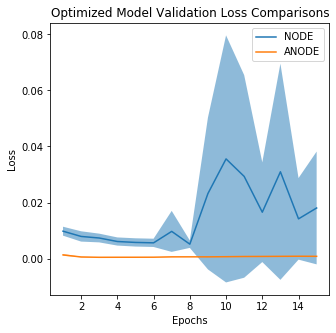

In [42]:
plt.plotLoss("Optimized Model Validation Loss Comparisons")

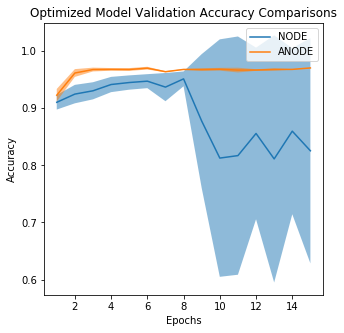

In [43]:
plt.plotAccuracy("Optimized Model Validation Accuracy Comparisons")

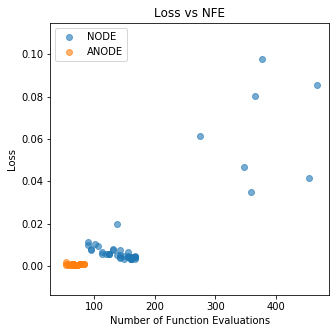

In [44]:
plt.plotNFE("Loss vs NFE", style='loss')

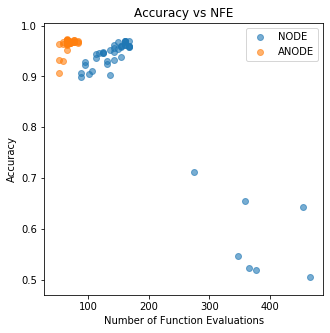

In [45]:
plt.plotNFE("Accuracy vs NFE", style='accuracy')